In [1]:
!wget https://itriaihub.blob.core.windows.net/github-download-resources/repository/ITRI-AI-Hub/datasets/HardHat_Dataset.YOLO.zip
!unzip HardHat_Dataset.YOLO.zip

--2024-11-11 11:14:30--  https://itriaihub.blob.core.windows.net/github-download-resources/repository/ITRI-AI-Hub/datasets/HardHat_Dataset.YOLO.zip
Resolving itriaihub.blob.core.windows.net (itriaihub.blob.core.windows.net)... 20.209.42.36
Connecting to itriaihub.blob.core.windows.net (itriaihub.blob.core.windows.net)|20.209.42.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3705720 (3.5M) [application/x-zip-compressed]
Saving to: ‘HardHat_Dataset.YOLO.zip’

HardHat_Dataset.YOL 100%[===================>]   3.53M  5.47MB/s    in 0.6s    

2024-11-11 11:14:31 (5.47 MB/s) - ‘HardHat_Dataset.YOLO.zip’ saved [3705720/3705720]

Archive:  HardHat_Dataset.YOLO.zip
   creating: HardHat_Dataset.YOLO/
  inflating: HardHat_Dataset.YOLO/data.yaml  
  inflating: HardHat_Dataset.YOLO/README.roboflow.txt  
   creating: HardHat_Dataset.YOLO/test/
   creating: HardHat_Dataset.YOLO/test/images/
  inflating: HardHat_Dataset.YOLO/test/images/000008_jpg.rf.8ddEpaD8kjf9Wwgm1P3I.j

In [2]:
#optional
!git clone https://github.com/R300-AI/AutoAugment.git
!pip install -r AutoAugment/requirements.txt

Cloning into 'AutoAugment'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 66 (delta 17), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 27.71 KiB | 13.85 MiB/s, done.
Resolving deltas: 100% (17/17), done.


https://huggingface.co/spaces/qubvel-hf/albumentations-demo

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


summary the samples...
process each samples limited to 0.8571428571428571 seconds.


100%|██████████| 70/70 [04:06<00:00,  3.52s/it]


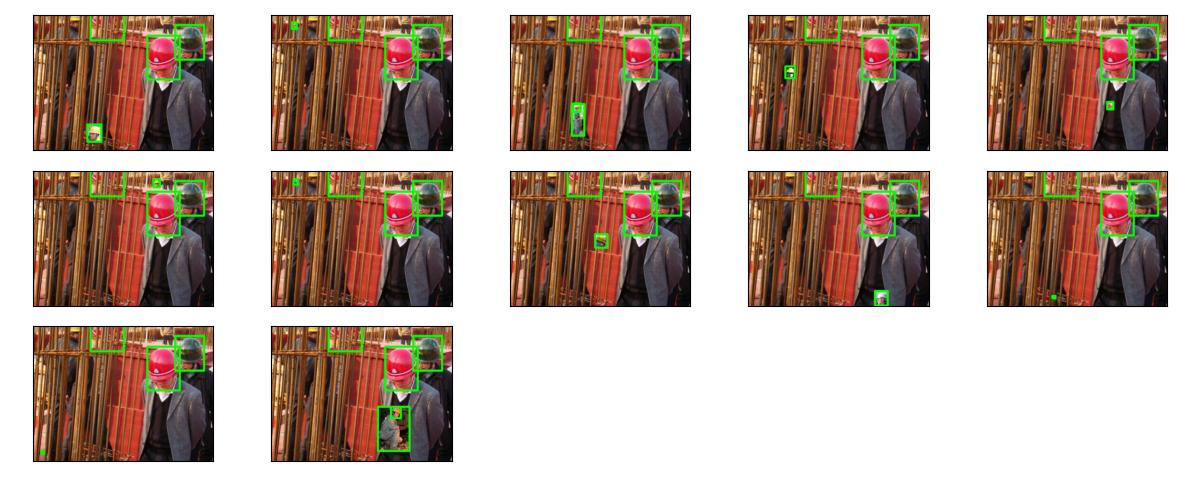

In [3]:
from AutoAugment.augmentors import ObjectAugmentor
from IPython.display import display, Image
import albumentations as A
import warnings, os

warnings.simplefilter("ignore")

augmentor = ObjectAugmentor(maximum_size = 16, maximum_process_second = 60)
NEW_DATASET_PATH = augmentor.fit('/content/HardHat_Dataset.YOLO', [A.Blur(p=0.8), A.CLAHE(p=0.8), A.GaussNoise(p=0.8), A.HorizontalFlip(p=0.5), A.PixelDropout(p=0.8),
                                      A.RandomBrightnessContrast(p=0.9), A.RandomShadow(p=0.8, shadow_intensity_range=(0.6, 0.9)),
                                      A.BBoxSafeRandomCrop(p=.7), A.ColorJitter(p=.8)] , save=True, verbose=True)

log = os.listdir(f"{NEW_DATASET_PATH}/log")[-1]
display(Image(filename=f"{NEW_DATASET_PATH}/log/{log}"))

In [7]:
#!pip install ultralytics
from ultralytics import YOLO

version = 'yolo11n'   # @param ['yolov5n', 'yolov8n', 'yolo11n']
model = YOLO(f'{version}.pt')
results = model.train(data='/content/HardHat_Dataset.YOLO/data.yaml', epochs=100)
results.results_dict

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/HardHat_Dataset.YOLO/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/HardHat_Dataset.YOLO/train/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/HardHat_Dataset.YOLO/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.58G       1.87      3.916      1.553         31        640: 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         20         65    0.00157      0.411     0.0172    0.00919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.4G      1.688      3.858      1.397         48        640: 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         20         65     0.0022      0.452     0.0397     0.0224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       2.4G      1.381      3.298      1.163         31        640: 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         20         65    0.00328      0.511     0.0794     0.0465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.39G      1.386      2.665      1.143         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         20         65    0.00468      0.604     0.0974      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.42G      1.442      2.322      1.157         60        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         20         65    0.00693      0.756      0.258      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.42G      1.393      2.076      1.157         36        640: 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         20         65      0.009      0.907      0.318        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.39G      1.363      1.761      1.169         35        640: 100%|██████████| 5/5 [00:01<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         20         65    0.00932      0.915      0.337      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.42G      1.321      1.648      1.176         20        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         20         65      0.764      0.211      0.404      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.39G        1.3      1.496      1.141         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         20         65      0.926      0.164       0.47      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.4G      1.293      1.477      1.168         63        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         20         65      0.923     0.0493      0.435      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.42G      1.178      1.357       1.12         23        640: 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         20         65      0.927       0.15       0.44      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.39G      1.234      1.337      1.116         27        640: 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         20         65      0.974      0.133      0.467      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.42G        1.3      1.333      1.164         28        640: 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         20         65       0.15      0.563      0.423      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.38G      1.238      1.253      1.161         37        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         20         65      0.911      0.107       0.46      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.42G      1.261      1.301      1.146         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         20         65      0.863     0.0821      0.497      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.35G      1.303      1.256      1.181         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         20         65          1     0.0418        0.5      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.39G      1.233      1.243      1.113         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         20         65      0.966     0.0656      0.357      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.42G      1.205      1.257      1.142         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         20         65      0.935     0.0922      0.335      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.43G        1.2      1.154      1.139         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         20         65      0.932      0.116      0.354      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.4G      1.243      1.223      1.146         21        640: 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         20         65       0.54      0.227      0.499      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.36G      1.224      1.195       1.12         62        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         20         65      0.572      0.324      0.531       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.37G      1.209      1.124      1.101         62        640: 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         20         65       0.65      0.541      0.599      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.43G      1.221      1.259      1.147         22        640: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         20         65      0.653      0.606      0.642       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.42G      1.122      1.086      1.096         62        640: 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         20         65      0.681       0.67      0.764      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.39G      1.117      1.109      1.069         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]

                   all         20         65      0.894      0.569      0.684      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.36G      1.158      1.104      1.074         52        640: 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         20         65      0.772       0.73       0.77      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.42G      1.272      1.271      1.189         20        640: 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         20         65      0.769      0.722      0.789       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.41G      1.256      1.058      1.097         26        640: 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         20         65      0.849       0.69      0.798      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.4G      1.165      1.118      1.086         36        640: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         20         65      0.858      0.694      0.812      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.39G      1.143      1.021      1.083         52        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         20         65      0.658      0.774       0.78      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.42G       1.09      1.024      1.048         20        640: 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         20         65      0.544      0.789      0.658      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.42G      1.147     0.9976      1.081         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         20         65      0.475      0.585      0.611      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.42G       1.09     0.9767      1.034         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         20         65       0.54      0.549      0.617      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.42G       1.23      1.119      1.141         20        640: 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         20         65      0.903      0.478      0.601      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.4G        1.1      1.029      1.131         30        640: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         20         65      0.884      0.456      0.575      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.34G      1.117     0.9998      1.103         39        640: 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         20         65      0.484      0.437      0.561      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.42G      1.184      1.031      1.065         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         20         65      0.558      0.509      0.567      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.35G      1.103     0.9547      1.063         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         20         65      0.568      0.525       0.58      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.39G      1.043     0.9097       1.03         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         20         65      0.574      0.524      0.577      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.38G      1.078     0.8808      1.059         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all         20         65      0.519      0.507      0.556       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.45G      1.059     0.8574      1.015         66        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         20         65      0.502      0.507      0.557      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.38G       1.07      0.899      1.047         45        640: 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         20         65      0.551      0.495      0.561      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.42G      1.043     0.9194      1.065         25        640: 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         20         65      0.561      0.506      0.572      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       2.4G      1.016     0.8836      1.019         50        640: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         20         65      0.526      0.584      0.609      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.39G      1.054     0.8658      1.054         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         20         65      0.541      0.761      0.617      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.41G      1.011      1.003      1.051         12        640: 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         20         65      0.568       0.77      0.621      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.39G      1.001     0.8957      1.061         28        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]

                   all         20         65      0.616      0.585      0.622      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.43G     0.9375     0.8284     0.9935         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         20         65      0.606      0.586      0.628      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.4G      0.949     0.8441     0.9807         64        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         20         65      0.593      0.607      0.643      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.39G     0.9719     0.8312      1.004         46        640: 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         20         65       0.58      0.782      0.662       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.38G     0.9669     0.8431     0.9917         70        640: 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         20         65      0.579        0.8      0.668      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.4G     0.9239     0.7964     0.9881         40        640: 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


                   all         20         65       0.92      0.619       0.67      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.42G     0.9374     0.7999     0.9588         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         20         65      0.936      0.604      0.658      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.39G     0.9337     0.8161      1.007         27        640: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         20         65      0.948      0.603      0.647      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.37G     0.9045     0.7687     0.9865         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         20         65      0.945      0.603      0.643      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.41G     0.8609     0.7612     0.9832         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         20         65      0.604      0.598      0.639      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.43G     0.8743     0.8101     0.9874         22        640: 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         20         65      0.604      0.599      0.633      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.4G     0.9598     0.8455     0.9948         29        640: 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         20         65      0.954      0.589      0.637      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.39G     0.8735     0.7628     0.9653         36        640: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         20         65      0.945      0.601       0.64      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.41G     0.8448     0.7154     0.9489         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


                   all         20         65       0.93      0.581      0.624      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.4G     0.8782     0.7667     0.9872         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         20         65       0.93      0.584      0.622      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.42G     0.9156     0.7684     0.9775         69        640: 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         20         65      0.918      0.581      0.619      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.4G     0.8395     0.7586     0.9734         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


                   all         20         65      0.562      0.617      0.621      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.42G     0.8783     0.7513     0.9627         31        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         20         65      0.574      0.577      0.623      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.42G     0.8561      0.751     0.9652         29        640: 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         20         65      0.574       0.57       0.61      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.39G     0.8412     0.7449     0.9679         34        640: 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         20         65      0.555      0.589       0.61      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.42G      0.891     0.7668     0.9677         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all         20         65      0.598      0.587      0.621       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.43G     0.8353     0.7099     0.9544         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         20         65      0.603      0.635      0.637       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.42G     0.8433     0.7417       0.95         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         20         65      0.627      0.643      0.641      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.39G     0.8173     0.7392     0.9698         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         20         65      0.971      0.608      0.644      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.34G     0.8131     0.6843     0.9279         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         20         65      0.972      0.613      0.644      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.39G     0.8086     0.6741     0.9293         36        640: 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         20         65      0.974      0.608      0.638      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.39G     0.8304     0.6985     0.9482         34        640: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         20         65      0.977      0.604      0.636       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.42G     0.8192      0.723     0.9628         37        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         20         65      0.978       0.61       0.64       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.37G     0.8105     0.6888     0.9245         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


                   all         20         65      0.618      0.619       0.64      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.42G      0.812     0.6858     0.9287         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         20         65      0.613      0.622      0.638      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.37G     0.8232     0.7012     0.9524         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         20         65      0.943      0.619      0.635      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.43G     0.8586       0.72     0.9408         23        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         20         65      0.955      0.615      0.636       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.45G     0.8031     0.6833     0.9311         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         20         65      0.963      0.604      0.637      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.42G     0.7388     0.6309     0.9188         44        640: 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         20         65      0.977      0.604       0.64      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.42G     0.7671     0.6555     0.9157         44        640: 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         20         65      0.979      0.608      0.641      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.35G     0.7647     0.6584     0.9489         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         20         65      0.973      0.611      0.643      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.38G     0.7909     0.6263     0.9364         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         20         65      0.968      0.611      0.643       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.41G      0.732     0.6344     0.9185         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all         20         65      0.958       0.61      0.642      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.42G     0.7726     0.6213     0.9353         31        640: 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         20         65      0.947      0.616      0.644      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.42G     0.7732     0.6558     0.9327         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         20         65      0.948      0.619      0.646      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.39G     0.7387     0.6341     0.9023         27        640: 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         20         65      0.944      0.619      0.647       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.42G     0.7211      0.617     0.8912         52        640: 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         20         65      0.945      0.618      0.652      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.39G     0.7343     0.6373     0.9575         28        640: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         20         65      0.945      0.618      0.651      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.45G     0.6906     0.6035     0.9078         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         20         65      0.944      0.613      0.648      0.473


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.54G     0.7498     0.7669     0.8997         19        640: 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         20         65      0.942      0.611      0.647      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.39G      0.715     0.7078     0.9029         12        640: 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         20         65      0.918      0.634      0.642      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.39G     0.7014     0.6858     0.9027         13        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         20         65      0.922      0.632      0.639       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.4G     0.6699     0.6855     0.8834         16        640: 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         20         65      0.915      0.626      0.638      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.39G     0.6736     0.6928     0.8871         13        640: 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         20         65      0.922      0.631      0.635      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.39G     0.6374     0.6859     0.8829         14        640: 100%|██████████| 5/5 [00:01<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         20         65      0.974      0.581      0.637      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.39G     0.6791     0.6772     0.8875         28        640: 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         20         65      0.949      0.611      0.636      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.39G     0.6519     0.6521     0.8866         19        640: 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         20         65      0.947      0.611      0.636      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.39G     0.6741      0.647     0.9011         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         20         65      0.951      0.615      0.637      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.42G     0.6498     0.6787     0.9035         10        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]

                   all         20         65      0.953      0.614      0.638      0.461



100 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


                   all         20         65       0.66       0.77      0.778      0.509
                  head          3         18      0.597      0.989      0.893      0.574
                helmet         17         45      0.972      0.822      0.901      0.635
                person          1          2       0.41        0.5       0.54       0.32
Speed: 0.5ms preprocess, 3.1ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train3


{'metrics/precision(B)': 0.6596164111582712,
 'metrics/recall(B)': 0.770355776117093,
 'metrics/mAP50(B)': 0.7780881215892119,
 'metrics/mAP50-95(B)': 0.5094214971703475,
 'fitness': 0.5362881596122339}